<a href="https://colab.research.google.com/github/drdhenrique/proj_toquio_airbnb/blob/main/Airbnb_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise de Dados - **Tóquio**

<center><img alt="Tokyo" width="75%" src="https://lp-cms-production.imgix.net/image_browser/The%20best%20free%20things%20to%20do%20in%20Tokyo.jpg?auto=format&fit=crop&q=40&sharp=10&vib=20&ixlib=react-8.6.4"></center>


## Introdução

Nesse projeto faremos uma análise exploratória de dados do **Airbnb** de acomodações na cidade de **Tóquio**, a capital *mais populosa do mundo*, com dados retirados do site [Airbnb Inside](http://insideairbnb.com/get-the-data/) (em 17-09-2023).

## Importação dos dados e pacotes utilizados

In [2]:
# Pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Dados

df = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2023-06-29/visualisations/listings.csv',
                 index_col = 'id')

print(f'As dimensões desse conjunto de dados são {df.shape[0]} linhas/observações e {df.shape[1]-1} variáveis')

As dimensões desse conjunto de dados são 11177 linhas/observações e 16 variáveis


# Análise de Dados

## Dicionário das Variáveis



**Dicionário das variáveis**

* **name -** Descrição do imóvel ou quarto
* **host_id -** Identificador numérico do anfitrião
* **host_name -** Nome do(s) anfitrião(s)
* **neighbourhood_group -** ??
* **neighbourhood -** Bairro em que se encontra o imóvel
* **latitude e longitude -** As coordenadas geográficas do imóvel ou quarto
* **room_type -** Tipo de hospedagem
* **price -** Preço da diária
* **minimum_nights -** Quantidade mínima de noites para hospedagem
* **number_of_reviews** Número (total) de reviews
* **last_review -** Data da última review registrada (na obtenção dos dados)
* **reviews_per_month -** Quantidade média de reviews mensais
* **calculated_host_listings_count -** Quantidade de hospedagens que um anfitrião possui disponível na região/cidade
* **availability_365 -** Disponibilidade para o imóvel/quarto nos próximos 365 dias
* **number_of_reviews_ltm -** Quantidade média de reviews mensais nos últimos 12 meses
* **license -** Licença do imóvel



Informações mais detalhadas podem ser encontradas em [Airbnb - Dicionário de dados](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1938308660)

## Análise Exploratória

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 3 primeiras entradas.

In [ ]:
df.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
197677,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,173,2023-05-30,1.21,1,24,8,M130003350
776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7208,3,243,2023-06-20,1.89,1,67,15,NaN
3427384,Rental unit in Edogawa · ★4.82 · 1 bedroom · 2...,13018876,Masakatsu,NaN,Edogawa Ku,35.68374,139.85971,Entire home/apt,7847,2,100,2023-05-22,0.93,2,231,19,Hotels and Inns Business Act | 東京都江戸川区保健所 | 18...


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
df.dtypes  # Ou df.info()

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Acima temos as variáveis e seus respectivos tipo, sendo *object* para textos (strings), *int64* para números inteiros e *float64* para números decimais (float ou double)

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
#@title
df.isnull().sum()/df.shape[0]*100

name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        11.201575
reviews_per_month                  11.201575
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                             8.410128
dtype: float64

Logo concluímos que **neighbourhood_group** está inteiramente 'vazia' e portanto não é uma variável interessante para análise, sendo uma variável passivel de eliminação completa. Já **license** tem $8$% de valores ausentes enquanto que **last_review** e **reviews_per_month** tem o mesmo percentual ($11.2$%) de valores ausentes, o que talvez mereça uma investigação mais aprofundada.

### **Q3. Qual o tipo de distribuição das variáveis?**

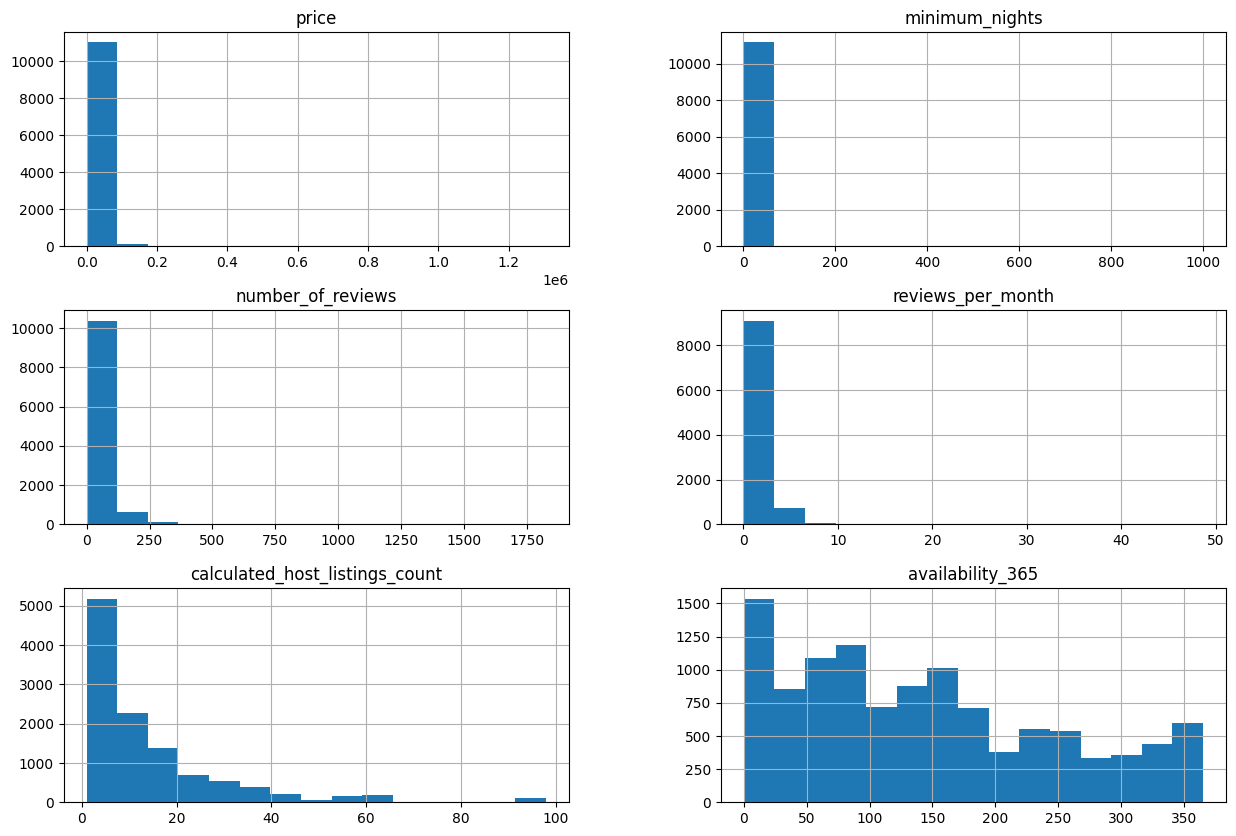

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].hist(bins=15, figsize=(15,10));

Aqui notamos que alguns valores altos transformam alguns dos histogramas em basicamente barras concentradas à esquerda. Talvez a remoção dos 10% maiores valores nessas categorias seja interessante para a melhor visualização das distribuições dos dados. Notemos que nem todas as variáveis foram analisadas, pois informações como nome dos anfitriôes entre outras não são de particular interesse.

### **Q4. Qual a média dos preços de aluguel?**


In [ ]:
print(df.price.mean()) # Preço médio


print(df.price.median()) # Mediana dos preços

21800.17070770332
14429.0


Aqui notemos uma diferença grande entre o preço médio e a mediana dos preços, talvez devido a algum valor com preço muito acima do meio. Uma análise relevante seria agrupar os dados por bairros e recalcular as médias.

#### Há *outliers* presentes?

In [4]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.117700e+04,11177.000000,11177.000000,9925.000000,11177.000000,11177.000000
mean,2.180017e+04,2.561779,36.477767,1.465815,13.671021,142.333095
std,4.844980e+04,12.179806,58.072851,1.640979,15.509964,105.100696
min,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,9.029000e+03,1.000000,4.000000,0.550000,4.000000,57.000000
50%,1.442900e+04,1.000000,16.000000,1.060000,8.000000,128.000000
75%,2.392900e+04,2.000000,46.000000,1.930000,18.000000,220.000000
max,1.306500e+06,1000.000000,1825.000000,48.640000,98.000000,365.000000


Aqui constatamos a presença se alguns pontos que distôam do padrão observado. Por exemplo, temos que $75% das acomodações tem mínimo de estadias como $2$, mas há um máximo de 1000, sendo totalmente distinto do padrão dos dados. Varemos agora a distribuição dos dados com a retirada de alguns dos *outliers*.

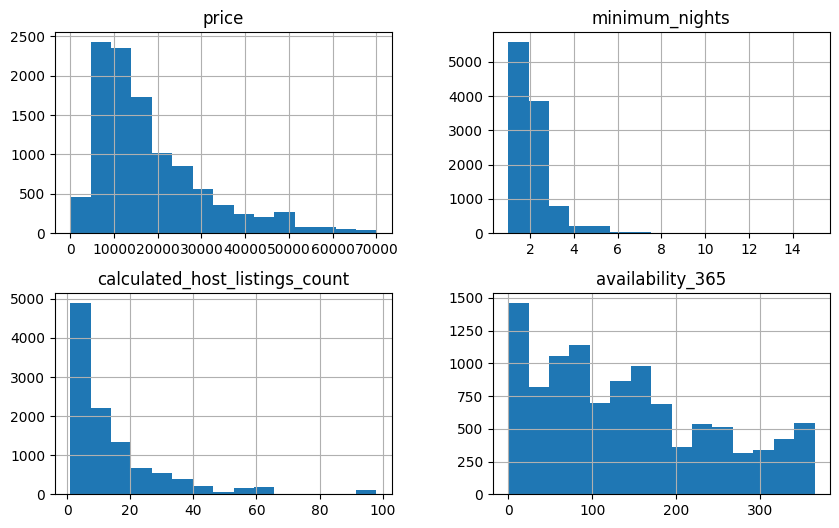

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 70000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean[['price', 'minimum_nights',
    'calculated_host_listings_count', 'availability_365']].hist(bins=15, figsize=(10,6));

Notemos que sem os valores muito altos, temos uma compreensão melhor da distribuição das variáveis, principalmente **price** e **minimum_nights**.



### **Q5. Qual a correlação existente entre as variáveis**



In [ ]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.153587,-0.012486,-0.009082,-0.020977,0.013420
minimum_nights,0.153587,1.000000,-0.025307,-0.042411,-0.035401,0.016591
number_of_reviews,-0.012486,-0.025307,1.000000,0.510215,-0.149875,-0.076067
reviews_per_month,-0.009082,-0.042411,0.510215,1.000000,-0.080536,0.022712
calculated_host_listings_count,-0.020977,-0.035401,-0.149875,-0.080536,1.000000,0.150380
availability_365,0.013420,0.016591,-0.076067,0.022712,0.150380,1.000000


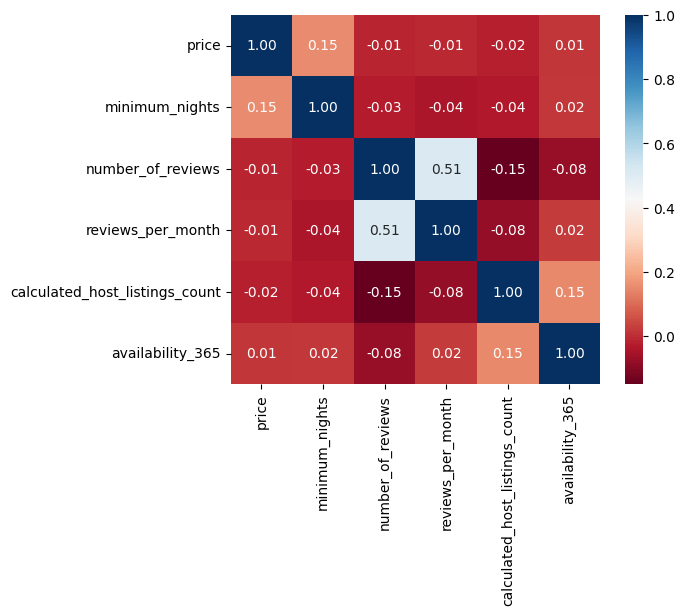

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pelas duas análises, notamos que a correlação entre quaisquer duas das variáveis selecionadas acima é praticamente nula, ou seja, o aumento em uma não altera significativamente a mudança (linear) em qualquer outra.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**



In [25]:
df.room_type.value_counts()

Entire home/apt    8085
Private room       2574
Hotel room          274
Shared room         244
Name: room_type, dtype: int64

Aqui concluímos que o tipo mais comum de acomodação disponível em **Tóquio** é casa/apartamento completo.

### **Q7. Qual a localidade mais cara do dataset?**


In [30]:
df.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]

neighbourhood
Shibuya Ku       20000.0
Chiyoda Ku       18778.5
Mitaka Shi       18666.5
Minato Ku        18000.0
Shinjuku Ku      17232.5
Taito Ku         16571.0
Chuo Ku          15328.5
Musashino Shi    14286.0
Okutama Machi    14143.0
Shinagawa Ku     14122.0
Name: price, dtype: float64

In [29]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Okutama Machi    51428.666667
Chiyoda Ku       39425.937500
Meguro Ku        34869.681159
Edogawa Ku       34837.019139
Kodaira Shi      33362.400000
Shinagawa Ku     27115.319767
Minato Ku        26625.053790
Shinjuku Ku      25812.402107
Shibuya Ku       25364.965152
Katsushika Ku    23081.463710
Name: price, dtype: float64

Aqui nos valemos de duas contagens, uma usando média e outra a mediana dos valores. A mediana nos fornece uma região 'num geral' mais cara, já a média nos fornece o bairro com o valor médio mais caro. Isso pode ser um problema devido à aqueles valores extremamente grandes já visualizados nos histogramas e estatísticas descritivas acima, logo talvez uma análise mais sensata seria utilizarmos o conjunto de dados excluindo aqueles valores atípicos, obtendo assim:

In [31]:
df_clean.groupby(['neighbourhood']).price.mediaan().sort_values(ascending=False)[:10]

neighbourhood
Minato Ku       22830.296791
Shibuya Ku      22260.830619
Chiyoda Ku      22256.600000
Taito Ku        20743.963057
Shinjuku Ku     20436.573929
Komae Shi       20000.000000
Chuo Ku         19814.684982
Shinagawa Ku    17193.528302
Toshima Ku      16848.199582
Mitaka Shi      16821.444444
Name: price, dtype: float64

In [32]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Minato Ku       22830.296791
Shibuya Ku      22260.830619
Chiyoda Ku      22256.600000
Taito Ku        20743.963057
Shinjuku Ku     20436.573929
Komae Shi       20000.000000
Chuo Ku         19814.684982
Shinagawa Ku    17193.528302
Toshima Ku      16848.199582
Mitaka Shi      16821.444444
Name: price, dtype: float64

Comparando ambos os resultados, notamos que há um diferença grande entre as médias dos bairros com acomodações mais caras. Tudo nos leva a crer que os valores atípicos sobem muito as médias de alguns locais, por exemplo **Okutama Machi**. Notamos também que as medianas se mantém mais estáveis, o que mostra que esse pode ser um valor mais confiável sobre uma estimativa *central*.

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**


In [33]:
df.minimum_nights.mean()

2.5617786525901405

In [36]:
df.minimum_nights.median()

1.0

In [38]:
df_clean.minimum_nights.mean()

1.7069013690975132

Por fim, o temos que o número médio de noites é de 2 noites. Com todas as acomodações sendo consideradas, a média é um pouco maior que 2, quanto que tirando os valores atípicos, é menor pouco menor que 2. A mediana em ambos os casos é $1$ e um comando mais interessante nesse caso é o utilizado abaixo.

In [40]:
df_clean.minimum_nights.describe()

count    10737.000000
mean         1.706901
std          1.105998
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: minimum_nights, dtype: float64

Aqui temos que $75$% das acomodações exigem estadia mínima de 2 dias ou menos, o qu condiz com nossas médias acima.